In [10]:
# Importing all neccessary liberaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import math
from mpl_toolkits import mplot3d

### Received Signal Strength Indicator (RSSI): 
This technology is commonly used for wireles  indoor localization or postioning systems. In this, a log-distance path loss model is built. This model is obtained by curve fitting and the locations are determined by wighted least square algorithms. Another RSSI-based methods includes Fingerprint lacalization. The logarithmic-distance pathh loss model of RSSI is represented as: 
####                                           RSSI = -10 n log(d/do) + A + X
where, d is distance between transmitter and receiver , n is path-loss parameter, A is the RSSI with distance do from the transmitter, and X is the random variable of Gaussian-distribution with mean as 0 and sigma**2.
Usually, do value is assumed as 1m, So, the above equation can also be written as:
####                                            RSSI = -10 n log(d) + A



## Part 1):
In this part , the values for path-loss parameter and A is known, So, using the simplified second equation above, the RSSI mean readings will be calculated ranging from distance d=1 to d=140. 
Here, a function named RSSI_profile will be created which will return the list of RSSI values of varying distance range.

### Calculating RSSI values varying from d = 1 to 140:

In [11]:
# Function that returns the RSSI profile varying from d=1 to 140 at fixed n, A_ and standard deviation as 0
def RSSI_profile(n,A_):
    RSSI_list =[]
    for d in range(1,141):
        RSSI_ = -10 * n * math.log(d) + A_
        RSSI_list.append(RSSI_)
    return RSSI_list

# setting n and A_ values
n= 4
A_ = -50

# Retreiving values of RSSI
RSSI_ = RSSI_profile(n,A_)

# Converting list of RSSI values in dataframe with respective distances
RSSI_df = pd.DataFrame(np.arange(1,141),columns= ['distance(d)'])
RSSI_df['RSSI']=RSSI_

# Displaying the dataframe
print('The RSSI profile from distance 1 to 140 is as following table:')
display(RSSI_df)

The RSSI profile from distance 1 to 140 is as following table:


,distance(d),RSSI
0,1,-50.000000
1,2,-77.725887
2,3,-93.944492
3,4,-105.451774
4,5,-114.377516
...,...,...
135,136,-246.506195
136,137,-246.799237
137,138,-247.090147
138,139,-247.378957


The RSSI profile from distance 1 to 140 is as following table:
The RSSI profile from distance 1 to 140 is as following table:


,distance(d),RSSI
0,1,-50.000000
1,2,-77.725887
2,3,-93.944492
3,4,-105.451774
4,5,-114.377516
...,...,...
135,136,-246.506195
136,137,-246.799237
137,138,-247.090147
138,139,-247.378957


,distance(d),RSSI
0,1,-50.000000
1,2,-77.725887
2,3,-93.944492
3,4,-105.451774
4,5,-114.377516
...,...,...
135,136,-246.506195
136,137,-246.799237
137,138,-247.090147
138,139,-247.378957


## Part 2):
- The first step in this part is to calculate the co-ordinates of tiles. As, provided in instructions that, the tiles are square shaped and the distance will calculated from their centers. Thus, a function tile_co() is created to return center values of x and y co-ordinates( As , z is zero on floor of tiles).
- Then, from the calculated co-ordinates , the distance from three devices will be calculated using least square algorithm, which is :
####  d^2 = (x1-x)^2 + (y1-y)^2 + (z1-z)^2
- Therefore, the distances will be returned by function dist().
- Furthermore, the RSSI values with random variable having standard deviation of 5.1 , will be calculated calling fingerprint() function and appended in a list.
- Atlast, for better view of results, a table will be created having tile no. , x and y co-ordinates , RSSI values of all three devices at that particular location and tile.

### Creating x and y co-ordinates of tile centers:

In [12]:
# Function that returns x and y center coordinates
def tile_co(x,y):
    x_ ,y_ =[],[]
    
    # for x-axis center coordinates
    for i in range(1,x*2,2):
        x_.append(i/2)
        
    # for y-axis center coordinates
    for j in range(1,y*2,2):
        y_.append(j/2)
    return x_ ,y_

# calling function to get x and y centers given particular values
x_cent , y_cent =tile_co(100,60)

### Calculating distance of all three devices from different tile's centers:

In [13]:
# settinf values of co=ordinates of three devices
X1, Y1, Z1 = 0 , 30, 3
X2, Y2, Z2 = 50 , 60, 4
X3, Y3, Z3 = 100 , 30, 3

# Function that returns distance of given coordinates from list of center coordinates calculated above
def dist(x,y,z,xcent,ycent):
    dist=[]
    for i in xcent:
        for j in ycent:
            dist.append(math.sqrt((i-x)**2 + (j-y)**2 + (0-z)**2))        
    return dist

# Getting distance values for first device
first_dist= dist(X1, Y1, Z1,x_cent,y_cent)

# Getting distance values for second device
second_dist= dist(X2, Y2, Z2,x_cent,y_cent)

# Getting distance values for third device
third_dist= dist(X3, Y3, Z3,x_cent,y_cent)

### Calculating RSSI of all three devices from different tile's centers:

In [14]:
# Generating random number for normal distribution with mean as 0 and standard deviation as 5.1
x_rand =np.random.normal(scale = 5.1)

# Function that returns the RSSI values provided distances for given device
def fingerprint(dist,xrand):
    RSSI_list =[]
    for d in dist:
        RSSI_ = -10 * n * math.log(d) + A_ + x_rand
        RSSI_list.append(RSSI_)
    return RSSI_list

# Getting RSSI values for first device
first_fp= fingerprint(first_dist,x_rand)

# Getting RSSI values for second device
second_fp= fingerprint(second_dist,x_rand)

# Getting RSSI values for third device
third_fp= fingerprint(third_dist,x_rand)

### Creating table 2) consisting of RSSI values and their locations:

In [15]:
# Getting x and y values for df
x=[]
y=[]
for i in range(1,100*2,2):
    for j in range(1,60*2,2):
        x.append(i/2)
        y.append(j/2)

# Creating table that shows RSSI values of all three devices with grid tile number and respective x and y co-ordinates.
RSSI_device = pd.DataFrame(np.arange(1,len(first_fp)+1),columns = ['Grid_tile'])
RSSI_device['X']= x
RSSI_device['Y']=y
RSSI_device['RSSI1'] = first_fp
RSSI_device['RSSI2'] = second_fp
RSSI_device['RSSI3'] = third_fp

# Displaying the table
print('The table that shows RSSI values of all three devices with their grid tile number and,respective x and y co-ordinates is as follows: ')
display(RSSI_device)

The table that shows RSSI values of all three devices with their grid tile number and,respective x and y co-ordinates is as follows: 


,Grid_tile,X,Y,RSSI1,RSSI2,RSSI3
0,1,0.5,0.5,-180.453016,-218.877895,-230.573974
1,2,0.5,1.5,-179.088584,-218.481077,-230.466072
2,3,0.5,2.5,-177.676530,-218.083156,-230.361335
3,4,0.5,3.5,-176.213454,-217.684228,-230.259817
4,5,0.5,4.5,-174.695585,-217.284393,-230.161569
...,...,...,...,...,...,...
5995,5996,99.5,55.5,-230.161569,-201.238573,-174.695585
5996,5997,99.5,56.5,-230.259817,-201.174122,-176.213454
5997,5998,99.5,57.5,-230.361335,-201.125646,-177.676530
5998,5999,99.5,58.5,-230.466072,-201.093264,-179.088584


The table that shows RSSI values of all three devices with their grid tile number and,respective x and y co-ordinates is as follows: 
The table that shows RSSI values of all three devices with their grid tile number and,respective x and y co-ordinates is as follows: 


,Grid_tile,X,Y,RSSI1,RSSI2,RSSI3
0,1,0.5,0.5,-180.453016,-218.877895,-230.573974
1,2,0.5,1.5,-179.088584,-218.481077,-230.466072
2,3,0.5,2.5,-177.676530,-218.083156,-230.361335
3,4,0.5,3.5,-176.213454,-217.684228,-230.259817
4,5,0.5,4.5,-174.695585,-217.284393,-230.161569
...,...,...,...,...,...,...
5995,5996,99.5,55.5,-230.161569,-201.238573,-174.695585
5996,5997,99.5,56.5,-230.259817,-201.174122,-176.213454
5997,5998,99.5,57.5,-230.361335,-201.125646,-177.676530
5998,5999,99.5,58.5,-230.466072,-201.093264,-179.088584


,Grid_tile,X,Y,RSSI1,RSSI2,RSSI3
0,1,0.5,0.5,-180.453016,-218.877895,-230.573974
1,2,0.5,1.5,-179.088584,-218.481077,-230.466072
2,3,0.5,2.5,-177.676530,-218.083156,-230.361335
3,4,0.5,3.5,-176.213454,-217.684228,-230.259817
4,5,0.5,4.5,-174.695585,-217.284393,-230.161569
...,...,...,...,...,...,...
5995,5996,99.5,55.5,-230.161569,-201.238573,-174.695585
5996,5997,99.5,56.5,-230.259817,-201.174122,-176.213454
5997,5998,99.5,57.5,-230.361335,-201.125646,-177.676530
5998,5999,99.5,58.5,-230.466072,-201.093264,-179.088584


## Part 3):
- Here, a roaming device is given with its location co-ordinates. So, its distance from all other three devices will be calculated.
- Once, distance is known , the RSSI values can be retreived by using RSSI equation mentioned.
- Here also, the random variable of gaussian distribution is added in calculation of RSSI values.
- Moreover, for better view of the three devices and the roaming device , a figure is plotted which also tells the distances between all roaming device and all other three devices.
- The function roaming_device_RSSI is implemented to perform above operations.

### Calculating RSSI readings of roaming device from all three devices:

In [16]:
# Settind co-ordinates of roaming device
XR, YR, ZR = 30, 45, 0
# Generating random number for normal distribution with mean as 0 and standard deviation as 5.1
x_rand =np.random.normal(scale = 5.1)

# Function that returns RSSI of roaming device from given device
def roaming_device_RSSI(x,y,z,xrand):
    # Getting distance value of roaming device from given device
    roaming_device_dist = math.sqrt(((XR-0.5)-x)**2 + ((YR-0.5)-y)**2 + (ZR-z)**2)
    # Getting RSSI value of roaming device from given device
    roaming_device_RSSI = -10 * n * math.log(roaming_device_dist) + (A_) + xrand
    return roaming_device_RSSI , roaming_device_dist

# Getting RSSI value of roaming device from first device
roaming_first_RSSI, roaming_first_dist = roaming_device_RSSI(X1, Y1, Z1,x_rand)

# Getting RSSI value of roaming device from second device
roaming_second_RSSI, roaming_second_dist = roaming_device_RSSI(X2, Y2, Z2,x_rand)

# Getting RSSI value of roaming device from third device
roaming_third_RSSI, roaming_third_dist = roaming_device_RSSI(X3, Y3, Z3,x_rand)

# Displaying the values
print('1) Iteration')
print('The RSSI of roaming device from first device is {}'.format(roaming_first_RSSI))
print('The RSSI of roaming device from second device is {}'.format(roaming_second_RSSI))
print('The RSSI of roaming device from third device is {}'.format(roaming_third_RSSI))

1) Iteration
The RSSI of roaming device from first device is -190.51498264654938
The RSSI of roaming device from second device is -180.98414851107276
The RSSI of roaming device from third device is -221.7333522069628
1) Iteration
The RSSI of roaming device from first device is -190.51498264654938
The RSSI of roaming device from second device is -180.98414851107276
The RSSI of roaming device from third device is -221.7333522069628
1) Iteration
The RSSI of roaming device from first device is -190.51498264654938
The RSSI of roaming device from second device is -180.98414851107276
The RSSI of roaming device from third device is -221.7333522069628


### Visual representation of location of 3 Devices and Roaming device:

Text(0.5, 0.92, 'Plotting of 3 Devices and Roaming Device')

Text(0.5, 0.92, 'Plotting of 3 Devices and Roaming Device')

Text(0.5, 0.92, 'Plotting of 3 Devices and Roaming Device')

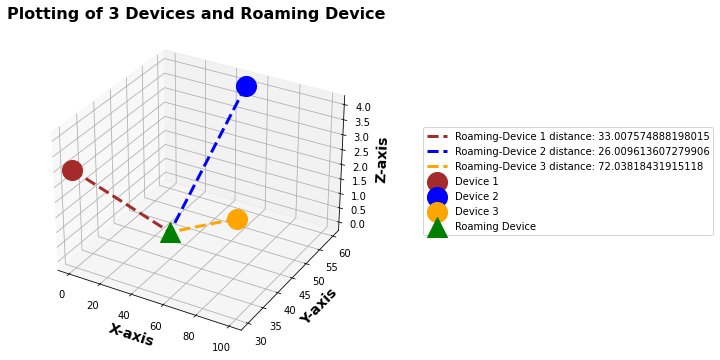

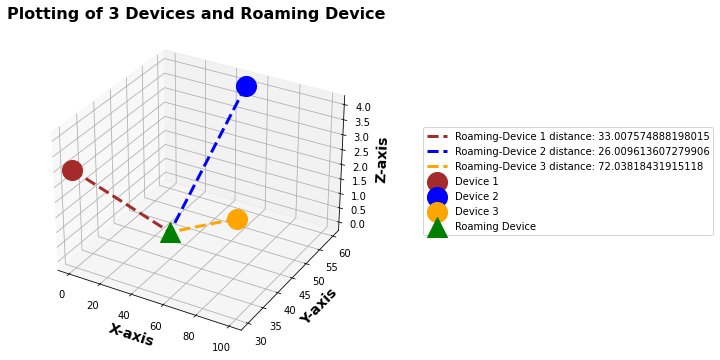

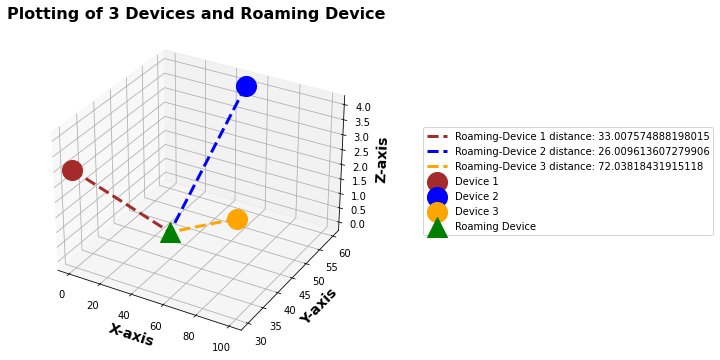

In [17]:
plt.figure(figsize=(10,6))
ax = plt.axes(projection = '3d')
ax.scatter(X1,Y1,Z1, color='brown', s = 400 ,label='Device 1')
ax.plot([X1,XR],[Y1,YR],[Z1,ZR], color = 'brown', linestyle ='dashed',linewidth =3,
        label ='Roaming-Device 1 distance: {}'.format(roaming_first_dist) )
ax.scatter(X2,Y2,Z2, color='blue', s = 400 ,label='Device 2')
ax.plot([X2,XR],[Y2,YR],[Z2,ZR], color = 'blue', linestyle ='dashed',linewidth =3,
        label ='Roaming-Device 2 distance: {}'.format(roaming_second_dist) )
ax.scatter(X3,Y3,Z3, color='orange', s = 400 ,label='Device 3')
ax.plot([X3,XR],[Y3,YR],[Z3,ZR], color = 'orange', linestyle ='dashed',linewidth =3,
        label ='Roaming-Device 3 distance: {}'.format(roaming_third_dist) )
ax.scatter(XR,YR,ZR, color='green' , marker='^', s = 400 ,label='Roaming Device')
ax.legend(bbox_to_anchor = (2.1,0.7))
ax.set_xlabel('X-axis',fontweight='bold',fontsize=14)
ax.set_ylabel('Y-axis',fontweight='bold',fontsize=14)
ax.set_zlabel('Z-axis',fontweight='bold',fontsize=14)
ax.set_title('Plotting of 3 Devices and Roaming Device',fontweight='bold', fontsize=16)

## Part 4): 
- In this part, the calculated RSSI value of roaming device from each device will be matched with the table created in part 2.
- This matching process will occur for 10 times which will return a different value everytime it runs because of random variable.
- Thus, all the values will be added in a list.
- Apart from the RSSI values, we also created list of tile no. , x and y co-ordinates of respective RSSI values.
- To view them better, these values will be stored in dataframe or table.
- atlast , their means( RSSI , x and y co-ordinates) will be computed.

### Calculating RSSI readings of roaming device from all three devices (10 times):

In [18]:
# initializing list to store tile no, x-axis, y-axis and RSSI values computed with with random variable
grid1 , grid2, grid3 = [], [], []
x_axis1, x_axis2, x_axis3 = [], [], []
y_axis1, y_axis2, y_axis3 = [], [], []
value1, value2, value3 = [], [], []

# computing values for 10 times
for iter in range(1,11):

    # Getting RSSI value of roaming device from first device
    roaming_first_RSSI = roaming_device_RSSI(X1, Y1, Z1,x_rand)

    # Getting RSSI value of roaming device from second device
    roaming_second_RSSI = roaming_device_RSSI(X2, Y2, Z2,x_rand)

    # Getting RSSI value of roaming device from third device
    roaming_third_RSSI = roaming_device_RSSI(X3, Y3, Z3,x_rand)
    
    # Generating random number for normal distribution with mean as 0 and standard deviation as 5.1
    x_rand =np.random.normal(scale = 5.1)

    # Displaying the values
    print('{}) Iteration'.format(iter))
    print('The RSSI of roaming device from first device is {}'.format(roaming_first_RSSI))
    print('The RSSI of roaming device from second device is {}'.format(roaming_second_RSSI))
    print('The RSSI of roaming device from third device is {}'.format(roaming_third_RSSI))
    
    # iterating through table created in part 2)
    for i in range(len(RSSI_device)):
        # matching the values of roaming device with first device
        if round(RSSI_device['RSSI1'][i], 1) == round(roaming_first_RSSI, 1):
            val1 = round(RSSI_device['RSSI1'][i], 1)
            grid_tile1 = RSSI_device['Grid_tile'][i]
            x1 = RSSI_device['X'][i]
            y1= RSSI_device['Y'][i]      
        # matching the values of roaming device with second device
        if round(RSSI_device['RSSI2'][i],1) == round(roaming_second_RSSI,1):
            val2 = round(RSSI_device['RSSI2'][i],1)
            grid_tile2 = RSSI_device['Grid_tile'][i]
            x2 = RSSI_device['X'][i]
            y2= RSSI_device['Y'][i]
        # matching the values of roaming device with third device
        if round(RSSI_device['RSSI3'][i],1) == round(roaming_third_RSSI,1):
            val3 = round(RSSI_device['RSSI3'][i],1)
            grid_tile3 = RSSI_device['Grid_tile'][i]
            x3 = RSSI_device['X'][i]
            y3= RSSI_device['Y'][i]

    # Displaying all the values retreived
    print('''The RSSI of roaming device matched with first device at grid tile: {} 
    and x and y co-ordinates as: ({},{}), with value: {}'''.format(grid_tile1 ,x1, y1, val1))
    print('''The RSSI of roaming device matched with third device at grid tile: {} 
    and x and y co-ordinates as: ({},{}), with value: {}'''.format(grid_tile2 ,x2, y2, val2))
    print('''The RSSI of roaming device matched with third device at grid tile: {} 
    and x and y co-ordinates as: ({},{}), with value: {}'''.format(grid_tile3 ,x3, y3, val3))
    print('\n')
    
    # Appending lists for first device
    grid1.append(grid_tile1)
    x_axis1.append(x1)
    y_axis1.append(y1)
    value1.append(val1)

    # Appending lists for second device
    grid2.append(grid_tile2)
    x_axis2.append(x2)
    y_axis2.append(y2)
    value2.append(val2)

    # Appending lists for third device
    grid3.append(grid_tile3)
    x_axis3.append(x3)
    y_axis3.append(y3)
    value3.append(val3)

1) Iteration
The RSSI of roaming device from first device is (-190.51498264654938, 33.007574888198015)
The RSSI of roaming device from second device is (-180.98414851107276, 26.009613607279906)
The RSSI of roaming device from third device is (-221.7333522069628, 72.03818431915118)


TypeError: type tuple doesn't define __round__ method

1) Iteration
The RSSI of roaming device from first device is (-190.51498264654938, 33.007574888198015)
The RSSI of roaming device from second device is (-180.98414851107276, 26.009613607279906)
The RSSI of roaming device from third device is (-221.7333522069628, 72.03818431915118)
1) Iteration
The RSSI of roaming device from first device is (-190.51498264654938, 33.007574888198015)
The RSSI of roaming device from second device is (-180.98414851107276, 26.009613607279906)
The RSSI of roaming device from third device is (-221.7333522069628, 72.03818431915118)


TypeError: type tuple doesn't define __round__ method

TypeError: type tuple doesn't define __round__ method

### Tables displaying matched values of roaming device with three different devices:

In [ ]:
# Function that create and returns table of matched value's tile no., x and y axis
def create_table(grid,x,y,val,name):
    df= pd.DataFrame(grid,columns=['Grid_tile_no.'])
    df['X']=x
    df['Y']=y
    df['RSSI_value']=val
    return df

# Creating table for all three devices
device1=create_table(grid1, x_axis1, y_axis1, value1,'first')
device2=create_table(grid2, x_axis2, y_axis2, value2,'second')
device3=create_table(grid3, x_axis3, y_axis3, value3,'third')

# Displaying the created tables
print('\n The table for matches with first device is as follows:')
display(device1)
print('\n The table for matches with second device is as follows:')
display(device2)
print('\n The table for matches with third device is as follows:')
display(device3)

### Calculating the mean RSSI , x and y co-ordinates of all three devices:

In [ ]:
# Calculating mean values of RSSI , x and y co-ordinates for first device
mean_val1=(device1['RSSI_value'].values).mean()
mean_x1=(device1['X'].values).mean()
mean_y1=(device1['Y'].values).mean()

# Calculating mean values of RSSI , x and y co-ordinates for second device
mean_val2=(device2['RSSI_value'].values).mean()
mean_x2=(device2['X'].values).mean()
mean_y2=(device2['Y'].values).mean()

# Calculating mean values of RSSI , x and y co-ordinates for third device
mean_val3=(device3['RSSI_value'].values).mean()
mean_x3=(device3['X'].values).mean()
mean_y3=(device3['Y'].values).mean()

# Displaying the calculated mean values of RSSI, x and y co-ordinates
print('The mean RSSI value of roaming device matched with first device is: {}'.format(mean_val1))
print('The mean (x,y,z) of roaming device matched with first device is: ({},{},0) \n'.format(mean_x1,mean_y1))
print('The mean RSSI value of roaming device matched with second device is: {}'.format(mean_val2))
print('The mean (x,y,z) of roaming device matched with second device is: ({},{},0)\n'.format(mean_x2,mean_y2))
print('The mean RSSI value of roaming device matched with third device is: {}'.format(mean_val3))
print('The mean (x,y,z) of roaming device matched with third device is: ({},{},0)\n'.format(mean_x3,mean_y3))

## Part 5):
- Once the mean values of x and y co-ordinates are calculated, the, they will be compared to table in part 2). 
- In this comparision, the difference between mean x and x values of table in part 2) will be calculated.
- Similarly, the difference between mean y and y values of table in part 2) will be calculated.
- After, getting the difference values, the minimum value among them will computed.
- The computed minimum value of x and y co-ordinated of all three devices will be defined as the Location Error.

### Calculating the location error between true and estimated values (using the tables in part 2)):

In [ ]:
# initializing lists to store the location errors of computed mean coordinates values and true table created in 2).
loc_x1, loc_y1=[],[]
loc_x2, loc_y2 =[],[]
loc_x3, loc_y3 = [], []

# iterating through table 2) and appendinf difference values of x-coordinates
for i in RSSI_device['X'].values:
    loc_x1.append(abs(i-mean_x1))
    loc_x2.append(abs(i-mean_x2))
    loc_x3.append(abs(i-mean_x3))
    
# iterating through table 2) and appendinf difference values of y-coordinates    
for j in RSSI_device['Y'].values:
    loc_y1.append(abs(j-mean_y1))
    loc_y2.append(abs(j-mean_y2))
    loc_y3.append(abs(j-mean_y3))

# Getting the minimum location-error value of first device 
loc_error_x1 = min(loc_x1)
loc_error_y1 = min(loc_y1)

# Getting the minimum location-error value of second device 
loc_error_x2 = min(loc_x2)
loc_error_y2 = min(loc_y2)

# Getting the minimum location-error value of third device 
loc_error_x3 = min(loc_x3)
loc_error_y3 = min(loc_y3)

# Displaying the location-error values
print('The location error of true and predicted values of first device is ({},{}) '.format(loc_error_x1, loc_error_y1))
print('The location error of true and predicted values of second device is ({},{}) '.format(loc_error_x2, loc_error_y2))
print('The location error of true and predicted values of third device is ({},{}) '.format(loc_error_x3, loc_error_y3))

## Part 6):
- In this part of the problem , estimated location values of roaming device will be calculated and then, will be comapred to its true position.
- In order to do so, firstly, the distance will be calculated using the RSSI value of roaming device calculated in part 3) and the RSSI model equation. This will be done for all three devices.
- Once , the distances are retreived, then using trilateration method the estimated location of roaming device will be found.
- Trilateration method stated that:
#### AX = B

where A = [[-2(x1-xn), -2(y1-yn), -2(z1-zn)],...........[-2(x(n-1)-xn), -2(y(n-1)-yn), -2(z(n-1)-zn)]]     and,

B = [[(d1^2 - dn^2) - (X1^2 - Xn^2) - (Y1^2 - Yn^2) - (Z1^2 - Zn^2)].......[(d(n-1)^2 - dn^2) - (X(n-1)^2 - Xn^2) - (Y(n-1)^2 - Yn^2) - (Z(n-1)^2 - Zn^2)
here, Aim is to find X =[[x,y,z]]
- So, using above method , first A and B is calculated , then X can be represented as:
#### X = (A ^-1)B
- Once, X matrix is calculated through above computation, their x , y and z values can be retreived and comapred to the true actual values provided in part 3).
- Here, a huge difference is noticed in the locations of estimated and true values . Also, their distance is calculated to see their difference.
- At the end, the figure is plotted visualizing the actual and estimated locations in 3-D plane and their distance difference.
- This comparision also proves that, RSSI is not a good candidate for solving localization or positioning problems. But, still in many cases of real world, it is used.

### Calculating the estimated distance of roaming device from devices ( Using part 3. readings and RSSI model):

In [ ]:
# The distance value of three devices calculated by part 3) reading and RSSI model
d1 = 2**((roaming_first_RSSI + 50 - x_rand)/(-10*4))
d2 = 2**((roaming_second_RSSI + 50- x_rand)/(-10*4))
d3 = 2**((roaming_third_RSSI + 50- x_rand)/(-10*4))

# Displaying the values
print('The distance value of first device calculated by part 3) reading and RSSI model is: {}'.format(d1))
print('The distance value of second device calculated by part 3) reading and RSSI model is: {}'.format(d2))
print('The distance value of third device calculated by part 3) reading and RSSI model is: {}'.format(d3))

### Calculating the estimated location of roaming device using ' Trilateration Method' :

In [ ]:
# Calculating the value elements of matrix A and B
A00 = -2*(X1-X3)
A01 = -2*(Y1-Y3)
A02 = -2*(Z1-Z3)
A10 = -2*(X2-X3)
A11 = -2*(Y2-Y3)
A12 = -2*(Z2-Z3)
B00 = (d1**2 - d3**2) - (X1**2 - X3**2) - (Y1**2 - Y3**2) - (Z1**2 - Z3**2)
B10 = (d2**2 - d3**2) - (X2**2 - X3**2) - (Y2**2 - Y3**2) - (Z2**2 - Z3**2)

# Creating matrix A and B
A = np.matrix([[A00, A01, A02], [A10, A11, A12]])
B = np.array([[B00], [B10]])

# Calculating the estimated co-ordinates values of roaming device or matrix X
X = np.linalg.pinv(A)*B

# Retreiving values as (x,y,z) co-ordinates
x_roaming_estimated = X[0,0]
y_roaming_estimated = X[1,0]
z_roaming_estimated = X[2,0]

# printing the estimated values
print('The estimated values of co-ordinates(x,y,z) of roaming device are:\n ({},{},{})'.format(x_roaming_estimated,
                                                                                    y_roaming_estimated,z_roaming_estimated))

### Comparing True and Estimated values of roaming device:

In [ ]:
# Creating comparision table of True and estimated values
Comparision_table = pd.DataFrame([XR,YR,ZR], columns= ['True_values'])
Comparision_table['Estimated_values'] = X[:,0]
Comparision_table['Location_error']= [(abs(XR-x_roaming_estimated)),(abs(YR-y_roaming_estimated)),(abs(ZR-z_roaming_estimated))]

# Computing difference through distance
roam_loc_err_dist = math.sqrt((x_roaming_estimated - XR)**2 + (y_roaming_estimated- YR)**2 + (z_roaming_estimated - ZR)**2)

# Displaying the comparision
print('The location error and difference through distance is: {}m \n'.format(roam_loc_err_dist))
print('The Comparision of both true and estimates values is as below:')
display(Comparision_table)

### Visual representation of comparision:

In [ ]:
plt.figure(figsize=(10,6))
ax1 = plt.axes(projection = '3d')
ax1.scatter(x_roaming_estimated,y_roaming_estimated,z_roaming_estimated, color='red', s = 400 ,
           label='Estimated Roaming Device Location')
ax1.scatter(XR,YR,ZR, color='green' , marker='^', s = 400 ,label='True Roaming Device Location')
ax1.plot([x_roaming_estimated,XR],[y_roaming_estimated,YR],[z_roaming_estimated,ZR], color = 'black', linestyle ='dashed',
         linewidth =3,label ='Location-Error of Roaming device: {}'.format(roam_loc_err_dist) )
ax1.legend(bbox_to_anchor = (2.1,0.7))
ax1.set_xlabel('X-axis',fontweight='bold',fontsize=14)
ax1.set_ylabel('Y-axis',fontweight='bold',fontsize=14)
ax1.set_zlabel('Z-axis',fontweight='bold',fontsize=14)
ax1.set_title('Plotting of True and Estimated location Roaming Device',fontweight='bold', fontsize=16)